In [2]:
#cloud check
import platform
import os

print("Running on:", platform.uname())
print("User:", os.getlogin())
print("Python path:", os.__file__)


Running on: uname_result(system='Darwin', node='Jordans-MacBook-Air.local', release='24.3.0', version='Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112', machine='arm64')
User: root
Python path: /opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/lib/python3.10/os.py


In [3]:
!python3 -V

Python 3.10.18


In [4]:
import pickle

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [10]:
import mlflow
from mlflow import pyfunc
from sklearn.pipeline import make_pipeline
from mlflow.models.signature import infer_signature

#mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_tracking_uri("http://127.0.0.1:5001")

mlflow.set_experiment("nyc_taxi_trip_duration_experiment")

<Experiment: artifact_location='/Users/jordanharris/Code/mlops_zoomcamp/mlruns/2', creation_time=1752572001788, experiment_id='2', last_update_time=1752572001788, lifecycle_stage='active', name='nyc_taxi_trip_duration_experiment', tags={}>

In [7]:
import os
print(os.getcwd())

#df = pd.read_parquet('/home/azureuser/j_harr/data/green_tripdata_2021-01.parquet')
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

/Users/jordanharris/Code/mlops_zoomcamp


In [8]:
df['duration'] = pd.to_datetime(df.lpep_dropoff_datetime) - pd.to_datetime(df.lpep_pickup_datetime)
df.duration = df['duration'].apply(lambda x: x.total_seconds() / 60)

In [9]:
td =  df.duration.iloc[0]
td

np.float64(3.933333333333333)

In [48]:
#df[df.trip_type == 2]


/var/folders/_r/_94p_t6s1933ynymfxl25_7h0000gn/T/ipykernel_5495/4187696625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

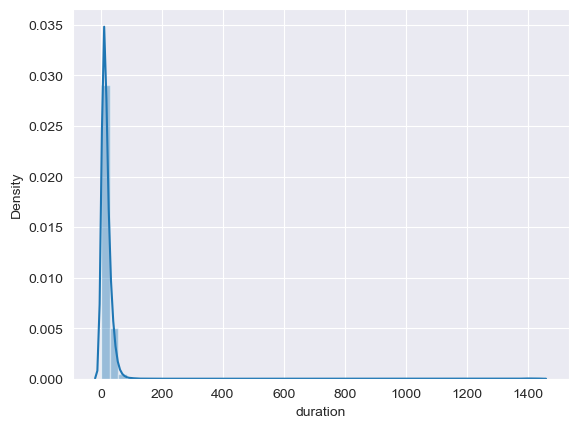

In [10]:
sns.distplot(df.duration)

In [11]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [12]:
#small filtering
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [13]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [14]:
#df[categorical].astype(str).dtypes
df[categorical] = df[categorical].astype(str)
#df.dtypes
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12},
 {'PULocationID': '168', 'DOLocationID': '75', 'trip_distance': 1.99},
 {'PULocationID': '75', 'DOLocationID': '75', 'trip_distance': 0.45},
 {'PULocationID': '225', 'DOLocationID': '265', 'trip_distance': 12.19},
 {'PULocationID': '244', 'DOLocationID': '244', 'trip_distance': 3.39},
 {'PULocationID': '75', 'DOLocationID': '213', 'trip_distance': 6.69},
 {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 2.34},
 {'PULocationID': '74', 'DOLocationID': '60', 'trip_distance': 5.48}]

In [15]:
train_dicts = df[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [16]:
#print(dv.feature_names_)
print(X_train.shape)
target = 'duration'
y_train = df[target].values
print(y_train.shape)


(73908, 507)
(73908,)


2025/07/15 17:00:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c88bb8fa818c419eb5428c349eb7eae7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run resilient-conch-314 at: http://192.168.178.84:5001/#/experiments/2/runs/c88bb8fa818c419eb5428c349eb7eae7
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


/var/folders/_r/_94p_t6s1933ynymfxl25_7h0000gn/T/ipykernel_10915/1518544609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/_r/_94p_t6s1933ynymfxl25_7h0000gn/T/ipykernel_10915/1518544609.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

MSE: 96.577
RMSE: 9.827
MAE: 7.224
R²: 0.278


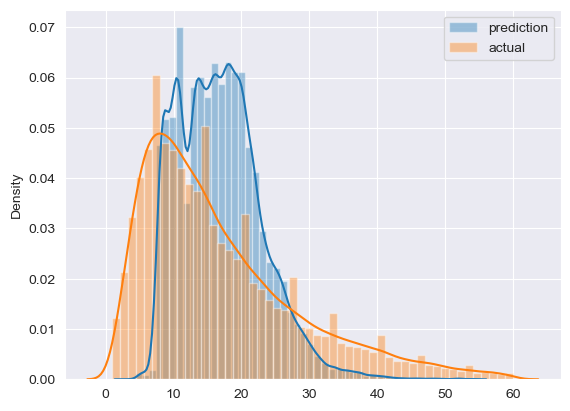

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

#------------------------------------------------------

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

In [6]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = pd.to_datetime(df.lpep_dropoff_datetime) - pd.to_datetime(df.lpep_pickup_datetime)
    df.duration = df['duration'].apply(lambda x: x.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    #numerical = ['trip_distance']
    df[categorical] = df[categorical].astype(str)

    return df

In [7]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')


In [8]:
len(df_train), len(df_val)

(73908, 61921)

In [9]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']


In [13]:
categorical = ['PU_DO']  #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [14]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [63]:
with mlflow.start_run(run_name="linear_regression"):

    mlflow.set_tag("model_type", "linear_regression")
    mlflow.set_tag("developer", "ja_harr")

    mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.parquet")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.parquet")

    ln = LinearRegression()
    ln.fit(X_train, y_train)

    y_pred = ln.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"MSE: {mse:.3f}")
    print(f"Root MSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R²: {r2:.3f}")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("R²", r2)


    ln_pipeline = make_pipeline(dv, ln)
    signature = infer_signature(X_train, y_train)
    #input_example = train_dicts[:5]

    mlflow.sklearn.log_model(
            sk_model=ln_pipeline,
            name="linear_model",
            signature=signature,
            #input_example=input_example,
            registered_model_name="linear_regression"  # optional, auto-register in the MLflow Model Registry
    )



MSE: 60.198
Root MSE: 7.759
MAE: 5.340
R²: 0.594


Registered model 'linear_regression' already exists. Creating a new version of this model...
2025/07/15 17:00:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: linear_regression, version 3
Created version '3' of model 'linear_regression'.


🏃 View run linear_regression at: http://192.168.178.84:5001/#/experiments/2/runs/38d95acd4c544536bda500c0330cadc0
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


In [64]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, ln), f_out)

In [65]:
with mlflow.start_run(run_name="lasso_regression"):
    mlflow.set_tag("model_type", "lasso_regression")
    mlflow.set_tag("developer", "ja_harr")

    mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.parquet")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.parquet")

    alpha = 0.01
    mlflow.log_param("alpha", alpha)

    l = Lasso(alpha=alpha)
    l.fit(X_train, y_train)

    y_pred = l.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"MSE: {mse:.3f}")
    print(f"Root MSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R²: {r2:.3f}")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("R²", r2)


    lasso_pipeline = make_pipeline(dv, l)
    signature = infer_signature(X_train, y_train)
    #input_example = train_dicts[:5]

    mlflow.sklearn.log_model(
            sk_model=lasso_pipeline,
            name="lasso_model",
            signature=signature,
            #input_example=input_example,
            registered_model_name="lasso_regression"  # optional, auto-register in the MLflow Model Registry
        )

MSE: 124.708
Root MSE: 11.167
MAE: 8.218
R²: 0.158


Registered model 'lasso_regression' already exists. Creating a new version of this model...
2025/07/15 17:01:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: lasso_regression, version 3
Created version '3' of model 'lasso_regression'.


🏃 View run lasso_regression at: http://192.168.178.84:5001/#/experiments/2/runs/0b971dafad094007a9c840027402ed03
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


In [66]:
with open('models/lasso.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)


In [67]:
with mlflow.start_run(run_name="ridge_regression"):
    mlflow.set_tag("model_type", "ridge_regression")
    mlflow.set_tag("developer", "ja_harr")

    mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.parquet")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.parquet")

    alpha = 0.001
    mlflow.log_param("alpha", alpha)

    r = Ridge(alpha=alpha)
    r.fit(X_train, y_train)

    y_pred = r.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"MSE: {mse:.3f}")
    print(f"Root MSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R²: {r2:.3f}")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("R²", r2)


    ridge_pipeline = make_pipeline(dv, r)
    signature = infer_signature(X_train, y_train)
    #input_example = train_dicts[:5]


    #example_df = df_val[categorical + numerical].iloc[:5]
    #preds = pipeline.predict(example_df)
    #signature = infer_signature(example_df, preds)

    mlflow.sklearn.log_model(
            sk_model=ridge_pipeline,
            name="ridge_model",
            signature=signature,
            #input_example=input_example,
            registered_model_name="ridge_regression"  # optional, auto-register in the MLflow Model Registry
    )

    #mlflow.log_artifact(local_path="models/ridge.bin", #artifact_path="models_pickle")

MSE: 56.414
Root MSE: 7.511
MAE: 5.068
R²: 0.619


Registered model 'ridge_regression' already exists. Creating a new version of this model...
2025/07/15 17:01:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ridge_regression, version 3


🏃 View run ridge_regression at: http://192.168.178.84:5001/#/experiments/2/runs/96f695f0bb5d467d93094de0e037c5d1
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


Created version '3' of model 'ridge_regression'.


In [68]:
with open('models/ridge.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)
#mlflow.log_artifact(local_path="models/ridge.bin", #artifact_path="models_pickle")
#Purpose

#A low‐level API for uploading any file you like (logs, plots, custom binary blobs, pickles, etc.) into the run’s artifact store.

#It does not wrap it in a standardized “MLmodel” directory or register it—it just copies the file.



In [10]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [11]:
import sklearn, sys
print("sklearn version:", sklearn.__version__)
print("python executable:", sys.executable)

sklearn version: 1.7.0
python executable: /opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/bin/python


In [24]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

NameError: name 'y_val' is not defined

In [72]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("R²", r2)

    return {'loss': rmse, 'status': STATUS_OK}

In [73]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0), # exp(-3), exp(0) - [0.05, 1]
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}
#The ranges in which we want hyperopt to explore the hyperparameters
#https://hyperopt.github.io/hyperopt/getting-started/search_spaces/

#best_result = fmin(
#    fn=objective, #fmin will try to optimize the given objective by minimizing the output
#    space=search_space,
#    algo=tpe.suggest, #algorithm to run the optimization
#    max_evals=50,
#    trials=Trials()# informatiuon for each run stored in tirals
#)

In [74]:
mlflow.xgboost.autolog(disable=True)

In [75]:
with mlflow.start_run():

    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    best_params = {
        'learning_rate': 0.09585355369315604,
        'max_depth': 30,
        'min_child_weight': 1.060597050922164,
        'objective': 'reg:linear',
        'reg_alpha': 0.018060244040060163,
        'reg_lambda': 0.011658731377413597,
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )

    y_pred = booster.predict(valid)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("R²", r2)

    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

mlflow.xgboost.log_model(booster, artifact_path="xgboost_model")

/opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/lib/python3.10/site-packages/xgboost/callback.py:386: UserWarning: [17:01:32] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[0]	validation-rmse:11.44482
[1]	validation-rmse:10.77202
[2]	validation-rmse:10.18363
[3]	validation-rmse:9.67396
[4]	validation-rmse:9.23166
[5]	validation-rmse:8.84808
[6]	validation-rmse:8.51883
[7]	validation-rmse:8.23597
[8]	validation-rmse:7.99320
[9]	validation-rmse:7.78709
[10]	validation-rmse:7.61022
[11]	validation-rmse:7.45952
[12]	validation-rmse:7.33049
[13]	validation-rmse:7.22098
[14]	validation-rmse:7.12713
[15]	validation-rmse:7.04752
[16]	validation-rmse:6.98005
[17]	validation-rmse:6.92232
[18]	validation-rmse:6.87112
[19]	validation-rmse:6.82740
[20]	validation-rmse:6.78995
[21]	validation-rmse:6.75792
[22]	validation-rmse:6.72994
[23]	validation-rmse:6.70547
[24]	validation-rmse:6.68390
[25]	validation-rmse:6.66421
[26]	validation-rmse:6.64806
[27]	validation-rmse:6.63280
[28]	validation-rmse:6.61924
[29]	validation-rmse:6.60773
[30]	validation-rmse:6.59777
[31]	validation-rmse:6.58875
[32]	validation-rmse:6.58107
[33]	validation-rmse:6.57217
[34]	validation-rmse:

2025/07/15 17:03:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run masked-rat-416 at: http://192.168.178.84:5001/#/experiments/2/runs/59f0bd884ead4e348466aee84e2ba9f6
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


/opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/lib/python3.10/site-packages/mlflow/xgboost/__init__.py:168: UserWarning: [17:03:03] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  xgb_model.save_model(model_data_path)
2025/07/15 17:03:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from mlflow.models.signature import infer_signature

if mlflow.active_run():
    mlflow.end_run()


#model_classes = [RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR]
#model_names = ["RandomForest", "GradientBoosting", "ExtraTrees", "LinearSVR"]

model_classes = [GradientBoostingRegressor]
model_names = ["GradientBoosting"]

for model_class, model_name in zip(model_classes, model_names):

    with mlflow.start_run(run_name=f"FINAL_{model_name.lower()}"):
        mlflow.set_tag("model_type", model_name)
        mlflow.set_tag("status", "final_pipeline")

        mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
        mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")

        mlmodel = model_class()
        pipeline = make_pipeline(dv, mlmodel)
        pipeline.fit(train_dicts, y_train)

        y_pred = pipeline.predict(val_dicts)

        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        print(f"{model_name} - MSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("R²", r2)

        signature = infer_signature(train_dicts[:100], y_train[:100])

        mlflow.sklearn.log_model(
            sk_model=pipeline,
            name=f"{model_name}_pipeline_model",
            signature=signature,
            registered_model_name=f"{model_name}_pipeline"
        )

GradientBoosting - MSE: 45.459, RMSE: 6.742, MAE: 4.527, R²: 0.693


2025/07/18 13:00:49 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/07/18 13:00:49 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
Registered model 'GradientBoosting_pipeline' already exists. Creating a new version of this model...
Created version '3' of model 'GradientBoosting_pipeline'.


In [96]:
# Start fresh with proper organization
run_model_mapping = {
    "ae789ba22bf34e488bd0b7d44810541c": "LinearSVR",
    "ddafb65c247f4166af4914e747745126": "ExtraTreesRegressor",
    "49f7c2ea5fad4b4fa3fe2462e50e83bc": "GradientBoostingRegressor",
    "ac53a59eaeb9499d85a7a19f3e046ed1": "RandomForestRegressor",
}

for run_id, model_name in run_model_mapping.items():
    # Get original run with all its data
    original_run = mlflow.get_run(run_id)

    # Load the model (use whichever artifact path exists)
    try:
        model = mlflow.sklearn.load_model(f"runs:/{run_id}/model")
    except:
        model = mlflow.sklearn.load_model(f"runs:/{run_id}/{model_name}_model")

    # Create a final, clean run
    with mlflow.start_run(run_name=f"FINAL_{model_name.lower()}"):
        # Copy everything from original
        for param, value in original_run.data.params.items():
            mlflow.log_param(param, value)
        for metric, value in original_run.data.metrics.items():
            mlflow.log_metric(metric, value)

        # Clean tags
        mlflow.set_tag("model_type", model_name)
        mlflow.set_tag("status", "final_clean")

        # Single, properly named model
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_model"
        )

        print(f"✅ Created FINAL_{model_name.lower()} with all data")

2025/07/15 18:44:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/15 18:44:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Created FINAL_linearsvr with all data
🏃 View run FINAL_linearsvr at: http://192.168.178.84:5001/#/experiments/2/runs/91e7c2dc777a40b19822ab8de244950a
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


2025/07/15 18:44:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/15 18:45:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Created FINAL_extratreesregressor with all data
🏃 View run FINAL_extratreesregressor at: http://192.168.178.84:5001/#/experiments/2/runs/32af8c7e4d274683aabda3090aef0a98
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


2025/07/15 18:45:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/15 18:45:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Created FINAL_gradientboostingregressor with all data
🏃 View run FINAL_gradientboostingregressor at: http://192.168.178.84:5001/#/experiments/2/runs/22e227e88c5d4dd993659627d2845af6
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


2025/07/15 18:45:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/15 18:45:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Created FINAL_randomforestregressor with all data
🏃 View run FINAL_randomforestregressor at: http://192.168.178.84:5001/#/experiments/2/runs/69b7d264e675483da5a8cb98808b7756
🧪 View experiment at: http://192.168.178.84:5001/#/experiments/2


In [95]:
run_id   = "ac53a59eaeb9499d85a7a19f3e046ed1"
artifact = "model"   # <— the folder you just confirmed

model_uri = f"runs:/{run_id}/{artifact}"
pyfunc_model = mlflow.pyfunc.load_model(model_uri)

In [92]:
pyfunc_model

mlflow.pyfunc.loaded_model:
  artifact_path: /Users/jordanharris/Code/mlops_zoomcamp/mlruns/2/models/m-d765e8a165164df889771231ed42e85f/artifacts
  flavor: mlflow.sklearn
  run_id: ac53a59eaeb9499d85a7a19f3e046ed1

In [87]:
run_id =  '37efeed2c16f4f1a9d6a520e7b1f08cc'
model_uri = f"runs:/{run_id}/xgboost_model"
booster = mlflow.xgboost.load_model(model_uri)

# now you can call booster.predict on a DMatrix
import xgboost as xgb
dm = xgb.DMatrix(X_val)               # or new data

In [88]:
y_pred = booster.predict(dm)
y_pred[:10]

array([14.782765 ,  7.184751 , 15.971323 , 24.328938 ,  9.559302 ,
       17.115105 , 11.6522455,  8.688133 ,  8.962229 , 18.982166 ],
      dtype=float32)

In [17]:
y_val

array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
        7.        ,  7.        ])

In [12]:
import mlflow.sklearn

# Load model using the run ID
run_id = "64298b9e7868421cbf6a0505e1211879"
model_uri = f"runs:/{run_id}/GradientBoosting_pipeline_model"
pipeline = mlflow.sklearn.load_model(model_uri)

# Sample data
sample_data = [
   {'PULocationID': 74, 'DOLocationID': 130, 'trip_distance': 2.5, 'passenger_count': 1},
   {'PULocationID': 41, 'DOLocationID': 24, 'trip_distance': 1.8, 'passenger_count': 2}
]

# Predict
y_pred = pipeline.predict(sample_data)
print(y_pred)

[14.01973656 10.74484754]
